In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [95]:
# Define the Grid World Environment
grid_size = 5  # 5x5 Grid
goal_state = (4, 4)  # Bottom-right corner
actions = ['up', 'down', 'left', 'right']
action_dict = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

In [96]:
# Initialize Q-table (State-Action Table)
q_table = np.zeros((grid_size, grid_size, len(actions)))

In [97]:
# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.99  # Decay for exploration rate
min_epsilon = 0.01  # Minimum exploration rate
num_episodes = 500  # Number of episodes
max_steps = 50  # Max steps per episode


In [98]:
# Function to choose an action (Epsilon-Greedy Policy)
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return actions[np.argmax(q_table[state[0], state[1]])]  # Exploit


In [99]:
# Function to get the next state and reward
def step(state, action):
    new_state = (state[0] + action_dict[action][0], state[1] + action_dict[action][1])

    # Check if new state is out of bounds
    if new_state[0] < 0 or new_state[0] >= grid_size or new_state[1] < 0 or new_state[1] >= grid_size:
        new_state = state  # Stay in place

    # Reward System
    if new_state == goal_state:
        return new_state, 100  # Goal reached reward
    else:
        return new_state, -1  # Small penalty for each move

Episode 0: Total Reward = -50, Steps = 50
Episode 100: Total Reward = 83, Steps = 18
Episode 200: Total Reward = 93, Steps = 8
Episode 300: Total Reward = 93, Steps = 8
Episode 400: Total Reward = 93, Steps = 8


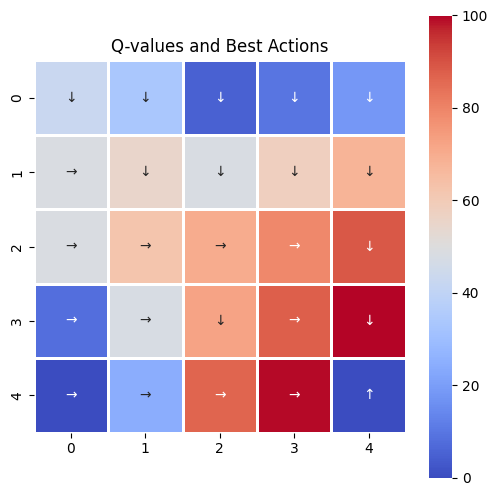

In [100]:
# Training Q-learning
rewards_per_episode = []
steps_per_episode = []

for episode in range(num_episodes):
    state = (0, 0)  # Start at top-left corner
    total_reward = 0
    steps = 0

    for _ in range(max_steps):
        action = choose_action(state)  # Select action
        next_state, reward = step(state, action)  # Get next state and reward

        # Update Q-value using Bellman Equation
        q_table[state[0], state[1], actions.index(action)] += alpha * (
            reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], actions.index(action)]
        )

        state = next_state
        total_reward += reward
        steps += 1

        if state == goal_state:
            break

    rewards_per_episode.append(total_reward)
    steps_per_episode.append(steps)

    # Decay epsilon (Reduce exploration over time)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    if episode % 100 == 0:
        print(f"Episode {episode}: Total Reward = {total_reward}, Steps = {steps}")

# Visualizing Q-values using a Heatmap
best_actions = np.argmax(q_table, axis=2)
action_symbols = np.array([['↑', '↓', '←', '→'][a] for a in best_actions.flatten()]).reshape((grid_size, grid_size))

plt.figure(figsize=(6, 6))
sns.heatmap(np.max(q_table, axis=2), annot=action_symbols, fmt='', cmap='coolwarm', linewidths=1, square=True)
plt.title("Q-values and Best Actions")
plt.show()


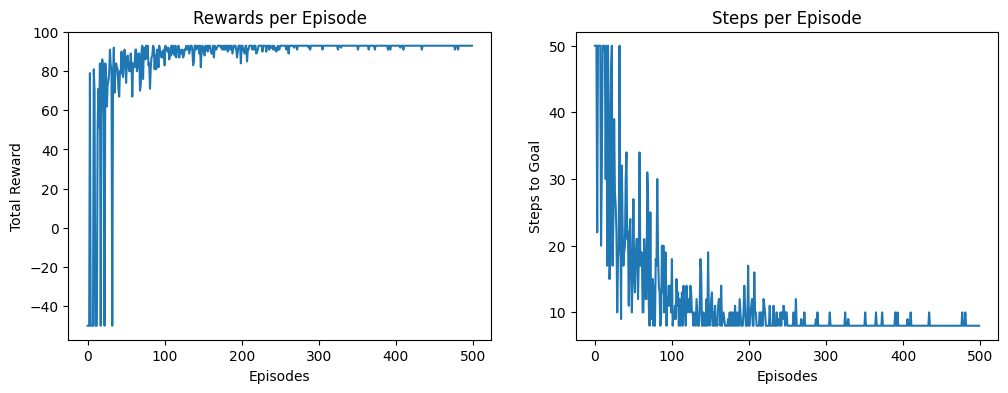

In [101]:
# Plot Training Performance
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Rewards per Episode')

plt.subplot(1, 2, 2)
plt.plot(steps_per_episode)
plt.xlabel('Episodes')
plt.ylabel('Steps to Goal')
plt.title('Steps per Episode')

plt.show()